In [1]:
from api_info import api_key
from stocknewsapi import StockNewsAPI

In [2]:
stocks = ['SPY']
sn = StockNewsAPI(api_key, remove_site_url=False, remove_topics=True)

filename = 'SPY_09_28_2021_12_57_21.csv'

news_df_dict = sn.load_existing_file(filename)

#news_df_dict = sn.get_company_ticker_news(stocks, item_count=50, api_call_per_stock=True)
news_df_dict.keys()

dict_keys(['SPY', 'EEM', 'IWM', 'QQQ', 'SQQQ', 'TQQQ', 'UVXY', 'VXX', 'XLE', 'XLF', 'DIA', 'ACN', 'ARTNA', 'FLIC', 'HBNC', 'INGR', 'JPM', 'LMT', 'MCD', 'BA', 'MGP', 'MPW', 'VICI', 'VNQ', 'AAPL', 'ERY', 'FNGU', 'GUSH', 'KOLD', 'LABU', 'NRGU', 'SOXL', 'TMV', 'UTSL', 'UUP', 'HYG', 'IEF', 'JNK', 'LQD', 'NOBL', 'RSP', 'TLT', 'AGG', 'ARKK', 'IBUY', 'IEFA', 'IWV', 'SCHB', 'VTI', 'XBI', 'IVV', 'IYY', 'VOO', 'DBC', 'GLD', 'TIP', 'TFI', 'IJH', 'KBH', 'EGRNF', 'ADC', 'ATO', 'ATVI', 'BAH', 'CCOI', 'CTRE', 'NHI', 'NNN', 'TAO', 'VZ', 'VGT', 'VIG', 'VO', 'VXF', 'AMT', 'FITB', 'FMAO', 'GSBC', 'INDB', 'MSFT', 'NFG', 'O', 'PM', 'REIT', 'STOR', 'TXN', 'USB', 'WPC', 'ADWPF', 'ANCTF', 'AQN', 'BEPC', 'CAE', 'ENB', 'FTS', 'HAS', 'ITPOF', 'LAZ', 'MGA', 'NTIOF', 'RY', 'AMC', 'AMD', 'BABA', 'BODY', 'CLOV', 'GME', 'LCID', 'PLTR', 'SDC', 'ACWI', 'SDIV', 'CMCSA', 'CSCO', 'CVX', 'EMR', 'IPG', 'T', 'DIS', 'GOOG', 'GOOGL', 'ESGU', 'SPLG', 'SPXL', 'SSO', 'UPRO', 'IYR', 'KWEB', 'BNTX', 'DVAX', 'MCHI', 'NFLX', 'NTES', '

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

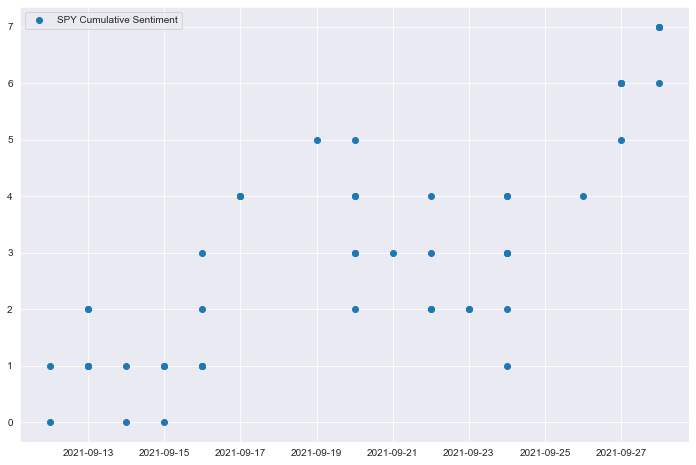

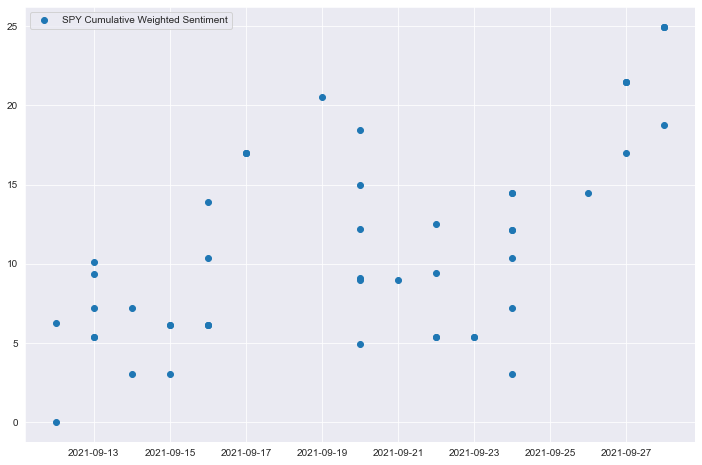

In [4]:
plt.figure(figsize=(12,8))
for stock in stocks:
    stock_df = news_df_dict[stock]
    if stock_df.shape[0] < 5:
        continue

    plt.scatter(stock_df.index, stock_df.cumulative_sentiment, label=f'{stock} Cumulative Sentiment')
    plt.legend()

plt.show()

plt.figure(figsize=(12,8))
for stock in stocks:
    stock_df = news_df_dict[stock]
    if stock_df.shape[0] < 5:
        continue
        
    plt.scatter(stock_df.index, stock_df.cumulative_rank_weighted_sentiment, label=f'{stock} Cumulative Weighted Sentiment')
    plt.legend()


plt.show()

In [17]:
import yfinance as yf
import numpy as np

symbol = 'SPY'
ticker = yf.Ticker(symbol)
hist = ticker.history(period='1y', interval='1d')
s_types = {'Open': np.float16}
hist = hist.astype(s_types)
print(hist.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-09-28 to 2021-09-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float16
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    int64  
 5   Dividends     253 non-null    float64
 6   Stock Splits  253 non-null    int64  
dtypes: float16(1), float64(4), int64(2)
memory usage: 14.3 KB
None


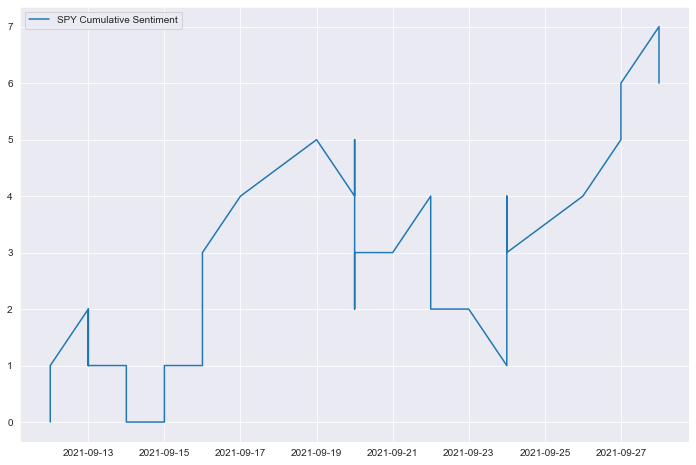

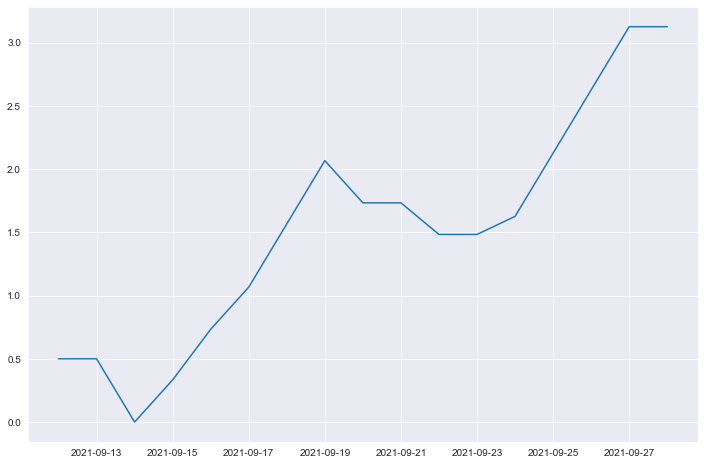

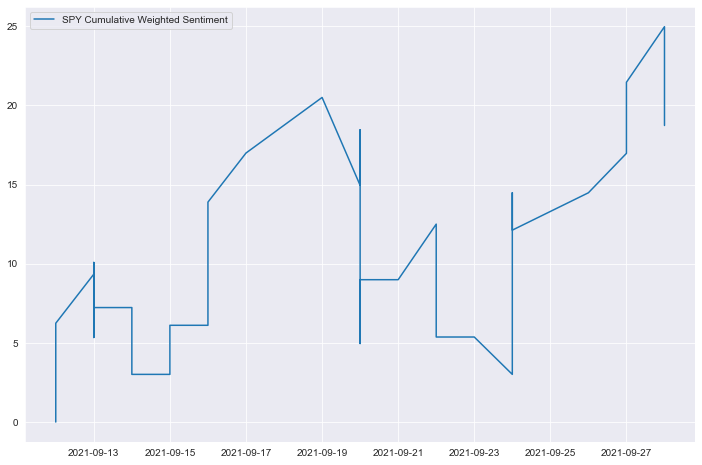

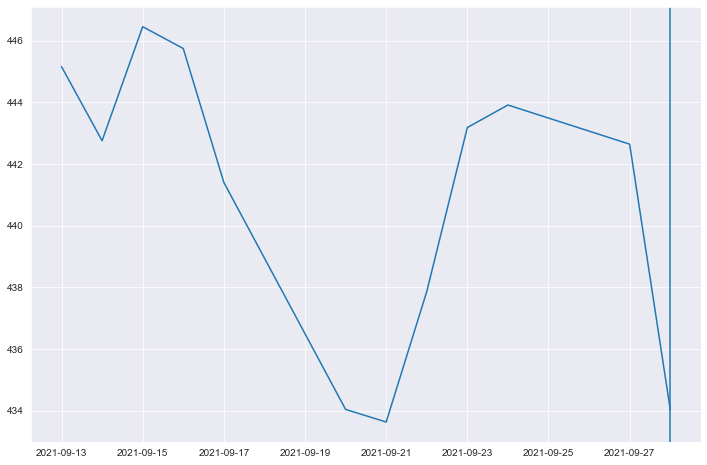

In [18]:
plt.figure(figsize=(12,8))
stock_df = news_df_dict['SPY']
begin = stock_df.index[0]
end = stock_df.index[-1]
hist_subset = hist.truncate(begin)

plt.plot(stock_df.index, stock_df.cumulative_sentiment, label=f'{stock} Cumulative Sentiment')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
average_daily_sentiment_cumulative = stock_df.groupby(stock_df.index).sentiment.mean().cumsum()
plt.plot(average_daily_sentiment_cumulative)

plt.figure(figsize=(12,8))
plt.plot(stock_df.index, stock_df.cumulative_rank_weighted_sentiment, label=f'{stock} Cumulative Weighted Sentiment')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(hist_subset.index, hist_subset.Close)
plt.axvline(end)
plt.show()


plt.show()

In [30]:
import pandas as pd
stock_df[['rank_score','news_url']].to_csv('out.csv')